# Spam Dectection
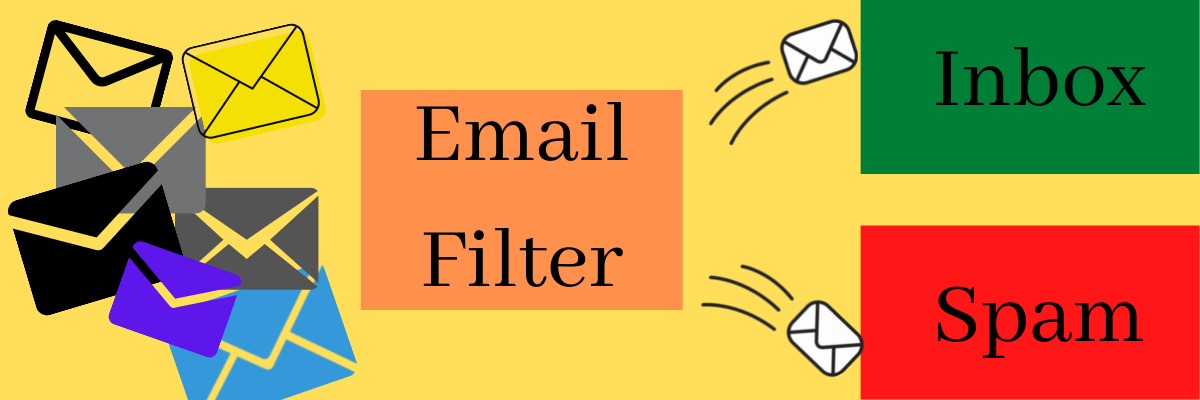

- The data was obtained from Kaggle datasets, which consisted of two columns, namely Category and Message.
- link to dataset: https://www.kaggle.com/datasets/mfaisalqureshi/spam-email

<h2>Objective:</h2>

  - Build a model to detect spam and ham using Logistic Regression
  
  <img
src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/images/mod_ID_24_final.png" width="400" align="center">

## Import necessary packages

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer

# Understanding the Data

The dataset consists of two columns:

The first column, named <b>Category</b>, represents the target feature which informs us whether the message is classified as spam or not.

The second column, named <b>Message</b>, contains the actual text of the message.





## Reading the data in

In [43]:
df = pd.read_csv('spam.csv')
#View the data
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [44]:
df.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


## Data Exploration

In [45]:
#total number of rows and columns
df.shape

(5572, 2)

In [46]:
#checking for null cells
df.isnull().sum()

Category    0
Message     0
dtype: int64

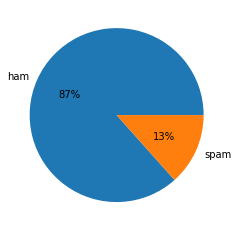

In [47]:
count = df['Category'].value_counts()
plt.pie(count, labels = count.index, autopct = '%0.0f%%')
plt.show()

More ham than spam messages in the dataset 

# Pre-processing

Let's select our feature and target labels

In [48]:
X = df["Message"].values
X


array(['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
       'Ok lar... Joking wif u oni...',
       "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
       ..., 'Pity, * was in mood for that. So...any other suggestions?',
       "The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free",
       'Rofl. Its true to its name'], dtype=object)

In [49]:
Y = df['Category'].values
# Encoding the labels
from sklearn import preprocessing
le_category = preprocessing.LabelEncoder()
le_category.fit(['ham','spam'])
Y = le_category.transform(Y) 
Y


array([0, 0, 1, ..., 0, 0, 0])

In [81]:
#removing punctuation and stop words.
def text_preprocess(Message):
    Message = Message.translate(str.maketrans('', '', string.punctuation))
    Message = [word for word in Message.split() if word.lower() not in  stopwords.words('english')]
    return " ".join(Message)

In [82]:
#vectorize the text data
vectorizer = TfidfVectorizer(stop_words="english")
message_mat = vectorizer.fit_transform(X)

# Train/Test Split

In [83]:
#Splitting the data into training and testing data
X_train, X_test, Y_train,Y_test = train_test_split(message_mat, Y, test_size=0.3, random_state=20)    

# Logistic Regression
- Logistic Regression is a type of regression analysis that is commonly used in statistical modeling when the dependent variable, y, is categorical. In contrast to linear regression, which is used when the dependent variable is continuous, logistic regression models the probability of an event occurring. This makes it suitable for predicting outcomes that have a binary or dichotomous nature, such as "yes" or "no", "success" or "failure", "0" or "1", and so on.
- By using logistic regression, one can estimate the probability of an event occurring, given a set of input variables. This can be used in a variety of applications, such as credit scoring, medical diagnosis, and marketing analytics, among others.

## Modelling

In [84]:
Logr = LogisticRegression()
#train the model
Logr.fit(X_train,Y_train)

LogisticRegression()

## Predictions

In [85]:
pred = Logr.predict(X_test)
print(pred[0:10])
print([Y_test[0:10]])

[0 0 0 0 0 0 0 0 0 0]
[array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0])]


## Evaluation

In [110]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print("Train set Accuracy: ", metrics.accuracy_score(Y_train, Logr.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(Y_test, pred))

Train set Accuracy:  0.9646153846153847
Test set Accuracy:  0.94377990430622


In [111]:
from sklearn.metrics import jaccard_score
jaccard_score(Y_test, pred,pos_label=0)

0.9385219097449313

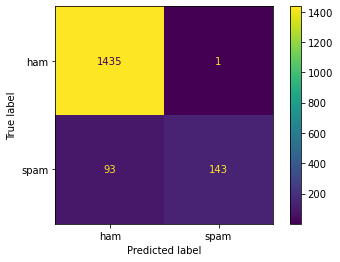

In [112]:
# Compute confusion matrix
confusion_matrix = metrics.confusion_matrix(Y_test, pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["ham", "spam"])

cm_display.plot()
plt.show()


In [113]:
#Report of the model
print (classification_report(Y_test, pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1436
           1       0.99      0.61      0.75       236

    accuracy                           0.94      1672
   macro avg       0.97      0.80      0.86      1672
weighted avg       0.95      0.94      0.94      1672



In [119]:
#returns the probability of a class being 0(first column) or 1(second column) 
#pred_prob = Logr.predict_proba(X_test)
#pred_prob

In [120]:
#This evaluates how well the classifier performs by determining if the anticipated probability differs from the real value.
#from sklearn.metrics import log_loss
#log_loss(Y_test, pred_prob)